In [1]:
import numpy as np
import utils.hops_sampler as hops_sampler
import utils.cancer_data as pathway
import networkx as nx
import matplotlib.pyplot as plt
from utils.visualize import show_pth

In [3]:
# Load both data and operate by class pathway
pathwayPATH = './Gene_DATA/sourcePathway.txt'
cancerPATH = './BreastCancer/Data_RNASeq2.mat'

# load the overall pathway and cancer data in object
data = pathway(pthwayPATH=pathwayPATH, cancerPATH=cancerPATH)

In [4]:
# sample the protein for the regression problem 
hops_samples_obj = hops_sampler(pathway = data, 
                                batch_size = 1, 
                                num_hops = 2)

In [5]:
pathway_info_namelist = data.pthway_NameList

In [6]:
# test on the first batch
batch = hops_samples_obj.samples[0]

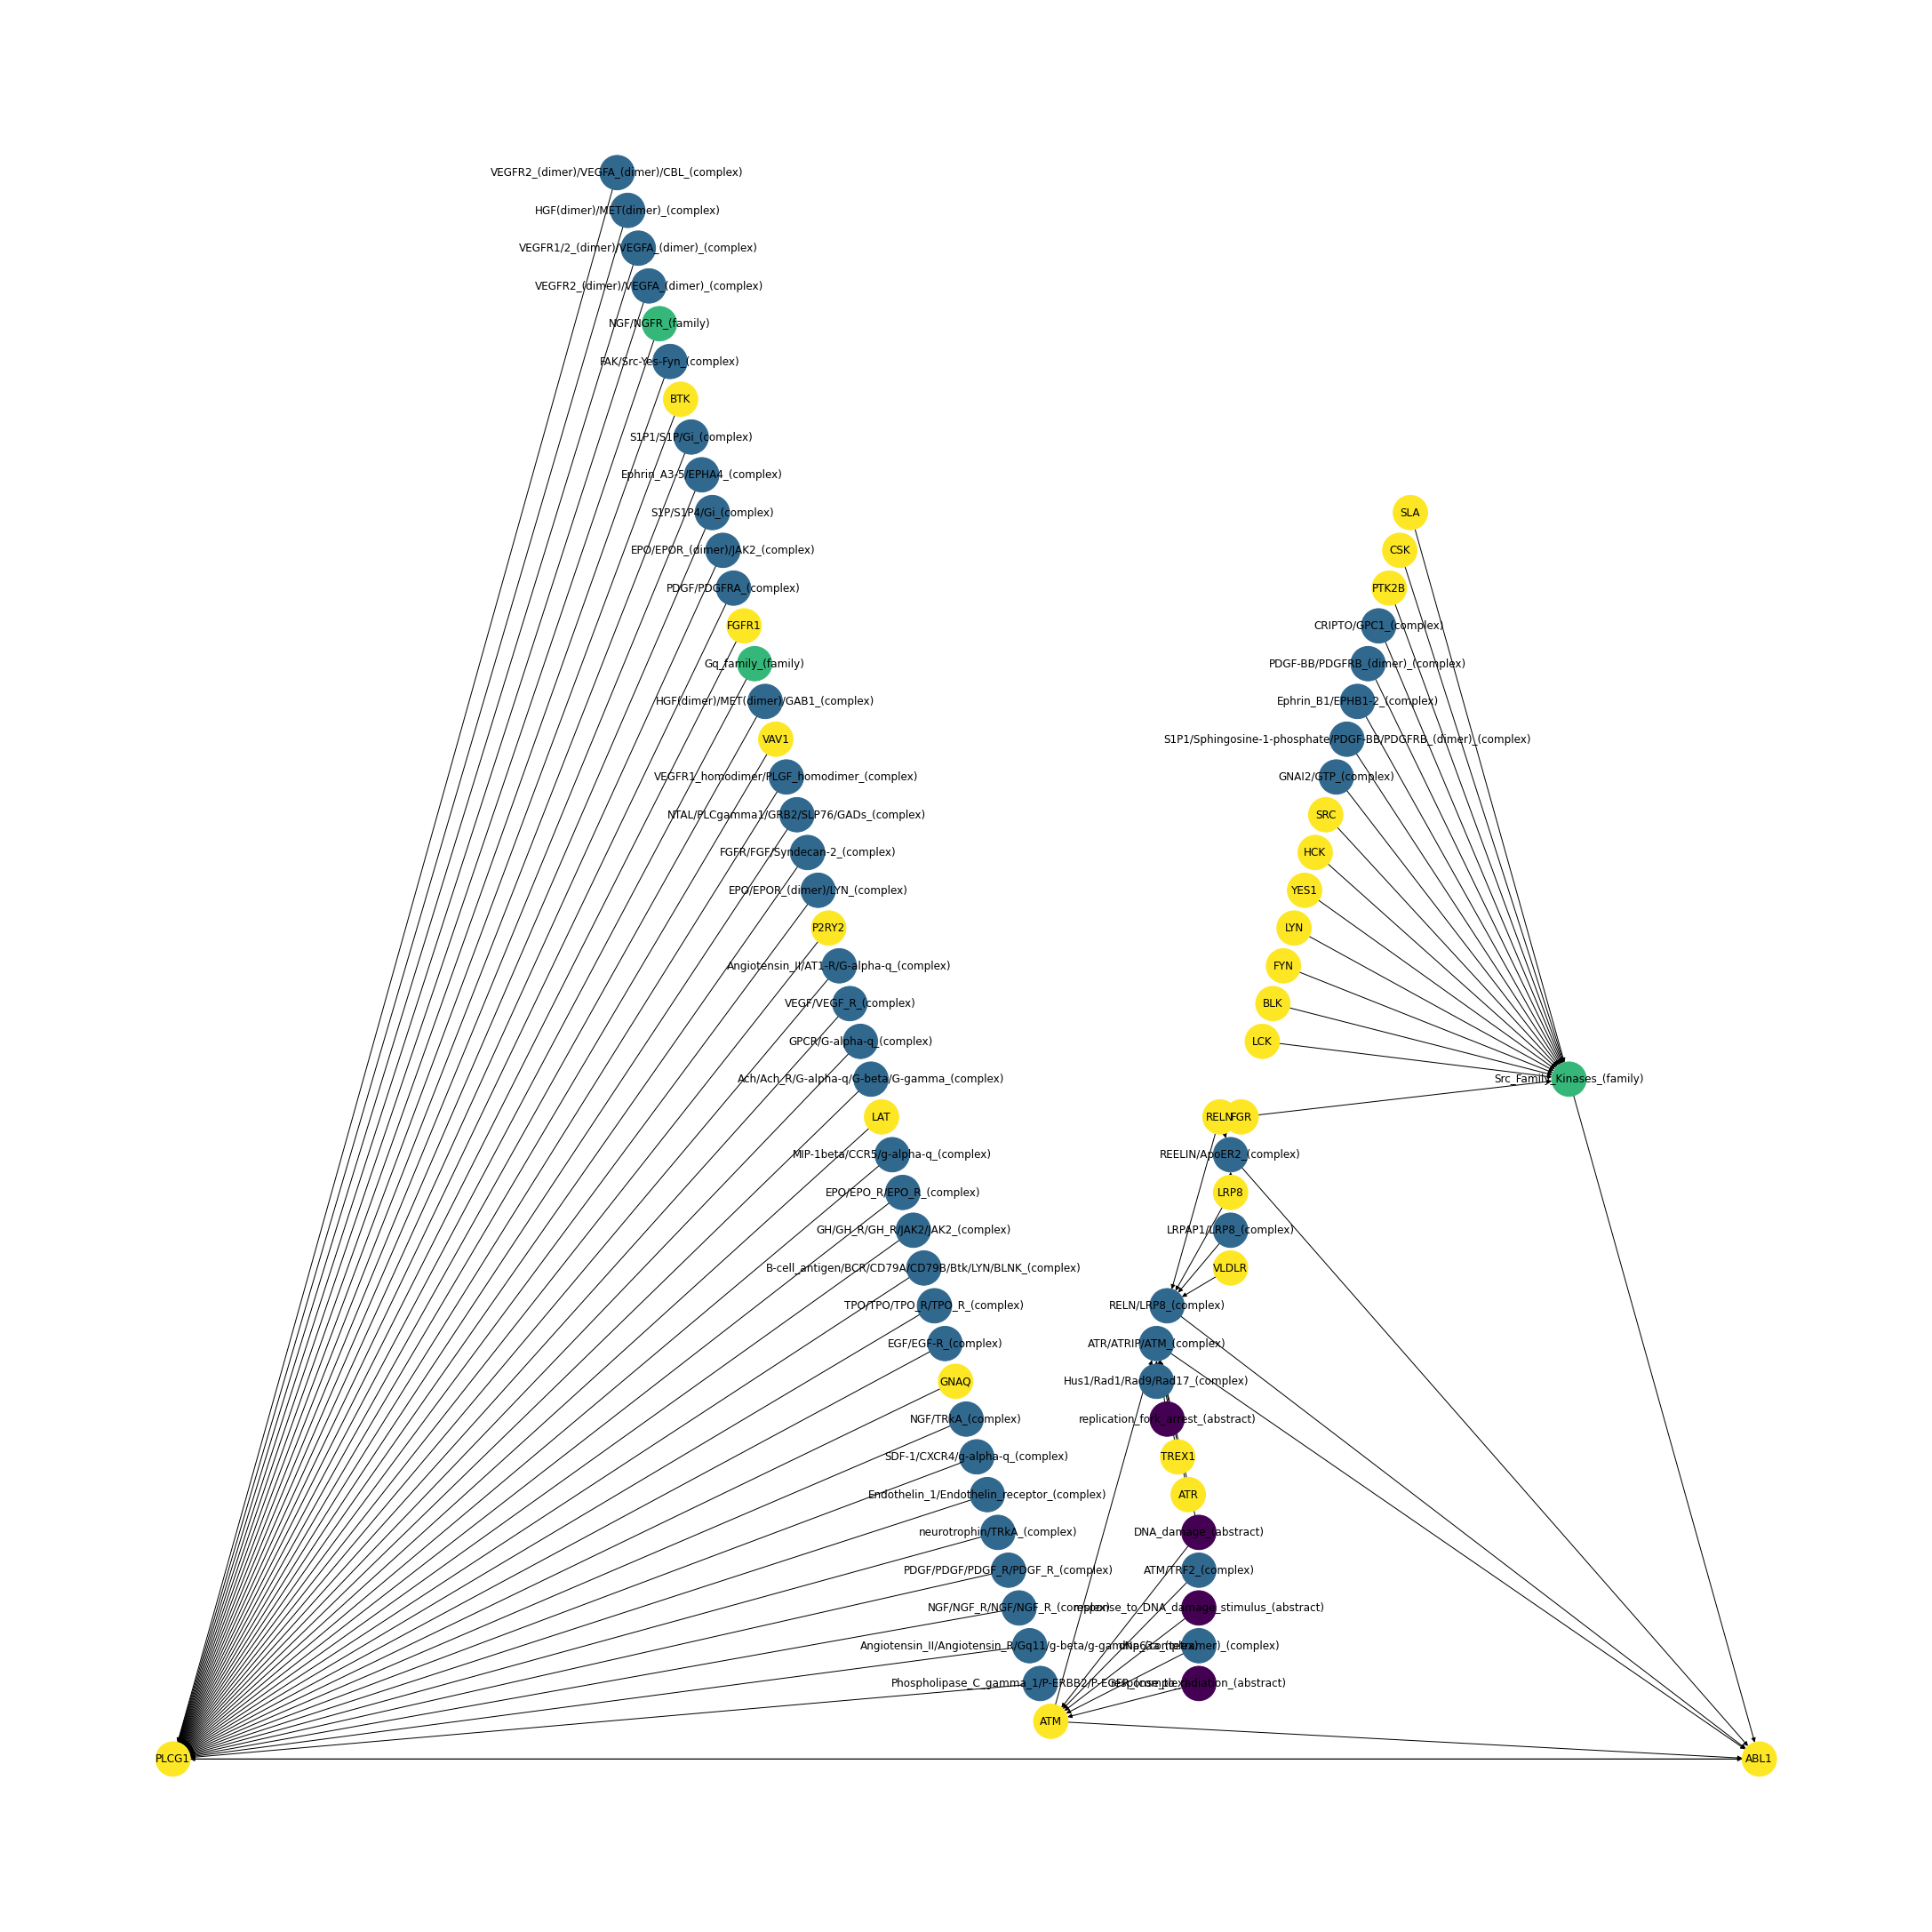

In [9]:
g = nx.DiGraph()
# we can put these input some global variable parts

for block in batch.dataflow:
    temp_edge_index = block.edge_index_ori
    temp_edge = pathway_info_namelist.iloc[temp_edge_index.reshape(-1),:]['GenomeName'].values.reshape(2,-1).T
    temp_edge = ([x,y] for x, y in zip(list(temp_edge[:,0]), list(temp_edge[:,1])))
    g.add_edges_from(temp_edge)
    

node_color = [data.node_class[data.pthway_NameList[data.pthway_NameList['GenomeName'] == name].index] for name in g.nodes()]    
plt.figure(figsize=(30,30))
nx.draw_planar(g, with_labels = True, node_size=1500, node_color=node_color) 

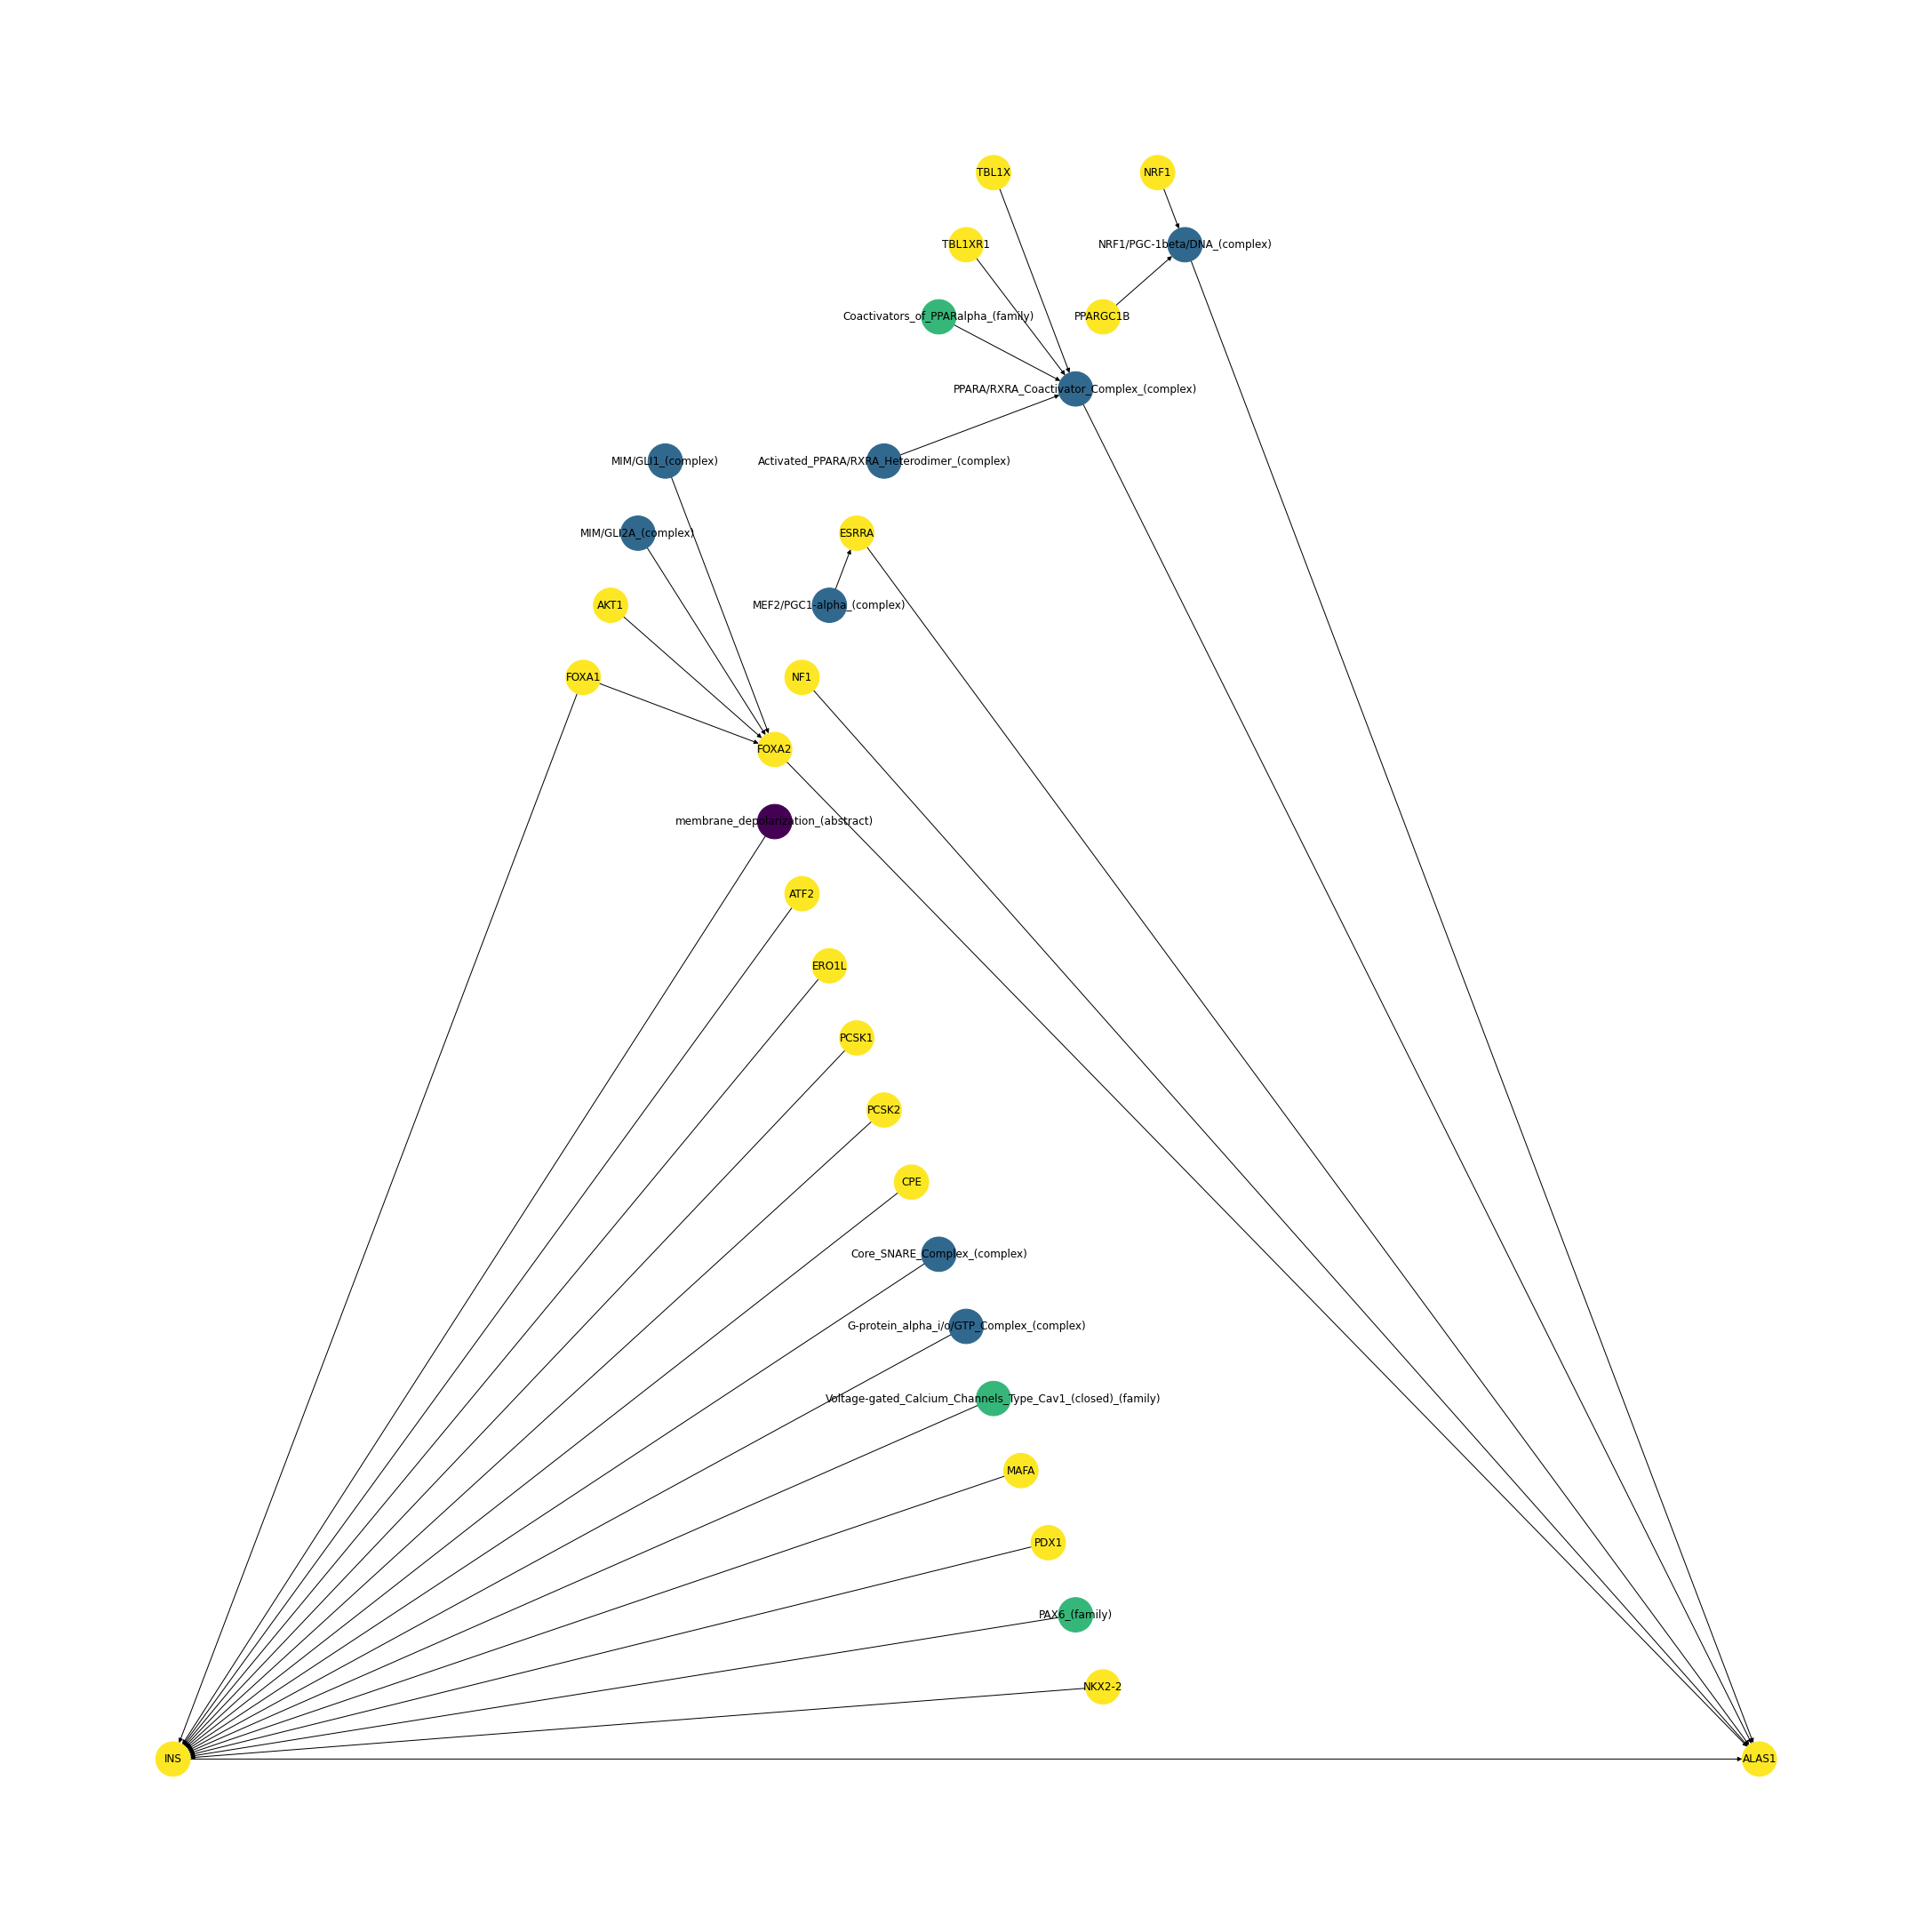

In [10]:
show_pth(data, hops_samples_obj.samples, 4)